In [1]:
%matplotlib inline
from scipy.stats import sem
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.patches as mpatches

In [2]:
#home value data
HV_file="County_MedianValuePerSqft_AllHo.csv"
home_val_df = pd.read_csv(HV_file)
home_val_df=home_val_df.sort_values("MedianValuePerSqft",ascending = False) 

In [3]:
#census data 
census_df=pd.read_csv("Resources/census_data.csv")                              #read in csv
county=[census_df["County"][x].split()[0] for x in range(5)]           #cut name to just county
census_df["County"]=county                                   

In [4]:
pop_df=census_df.iloc[:,1:3]                   #cut to just county and population
merge_df=pd.merge(home_val_df,pop_df,how='outer',on="County")
merge_df

,Year,County,MedianValuePerSqft,Population
0,2010,Hennepin,150,1136522.0
1,2010,Ramsey,122,503113.0
2,2010,Itasca,95,44835.0
3,2010,Stearns,87,147927.0
4,2010,Steele,77,36434.0


In [5]:
def myplot(plot_df,compare_val,big_title,x_title,left_y_title,right_y_title,outfile):
    '''
          plot home-value(bar graph) with compare_val (line plot) against county
          
          The parameters plot_df : the dataframe with columns 'MedianValuePerSqft', 'County' and compare_val 
          compare_val the other column for graphing as a line plot
          big_title main graph title
          x_title  title for the x axis
          left_y_title, right_y_title the titles for the left and right y axis
          outfile the directory and file name for the graph output file
          
    '''
    width=.5
    fig,ax1=plt.subplots(figsize=(7,7))
    ax2=ax1.twinx()
    fig.suptitle(big_title,fontsize=16,fontweight='bold')

    plot_df["MedianValuePerSqft"].plot(kind='bar', width = width,color='royalblue',ax=ax1,edgecolor='black')
    plot_df[compare_val].plot(kind='line',secondary_y=True,color='red')
                                                          #set shared values
    x_axis=np.arange(0,len(home_val_df["County"]))
    ax1.set_xticks(x_axis)
    ax1.set_xticklabels(merge_df["County"],fontsize=12,rotation=0)
    ax1.set_xlim(-.5, len(home_val_df["County"])-0.5)

    ax1.set_facecolor('lightgrey')                           #background
    #ax1.grid(color='white')

    plt.ylabel(right_y_title,color='red')                      #set y axis titles
    ax1.set_ylabel(left_y_title,color='blue',fontsize=12)
    # ax2.set_ylabel("Population",color='red',fontsize=12)
    #ax1.yaxis.tick_left()
    #ax2.yaxis.tick_right()

    plt.xlim([-width, len(plot_df["MedianValuePerSqft"])-width])
    plt.show()

    fig.savefig(outfile)               #Save the Figure

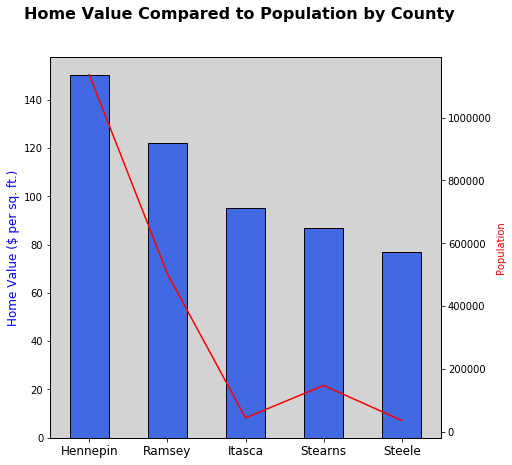

In [6]:
myplot(merge_df,"Population","Home Value Compared to Population by County","County","Home Value ($ per sq. ft.)",
       "Population","Output/home_val_population.png")

In [7]:
poverty_data=census_df.iloc[:,1:8]                   #cut to county through poverty rate
poverty_data["Above Poverty"]=((poverty_data["Population"]-poverty_data["Poverty Count"]) /poverty_data["Population"])*100

In [8]:
merge2_df=pd.merge(home_val_df,poverty_data,how='outer',on="County")
merge2_df

,Year,County,MedianValuePerSqft,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Above Poverty
0,2010,Hennepin,150,1136522.0,35.9,61328.0,35902.0,134363.0,11.822296,88.177704
1,2010,Ramsey,122,503113.0,34.7,51915.0,28956.0,77325.0,15.369311,84.630689
2,2010,Itasca,95,44835.0,44.5,45621.0,23465.0,5166.0,11.522248,88.477752
3,2010,Stearns,87,147927.0,33.1,51779.0,24816.0,17894.0,12.096507,87.903493
4,2010,Steele,77,36434.0,38.0,55321.0,25062.0,2717.0,7.457320,92.542680


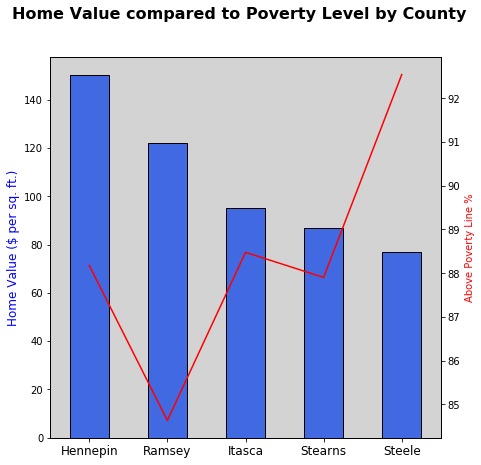

In [9]:
myplot(merge2_df,"Above Poverty","Home Value compared to Poverty Level by County","County","Home Value ($ per sq. ft.)",
       "Above Poverty Line %","Output/home_val_poverty.png")

In [10]:
#cut to just county and household income
income_df=census_df.iloc[:,1:5]                   
merge3_df=pd.merge(home_val_df,income_df,how='outer',on="County")
merge3_df

,Year,County,MedianValuePerSqft,Population,Median Age,Household Income
0,2010,Hennepin,150,1136522.0,35.9,61328.0
1,2010,Ramsey,122,503113.0,34.7,51915.0
2,2010,Itasca,95,44835.0,44.5,45621.0
3,2010,Stearns,87,147927.0,33.1,51779.0
4,2010,Steele,77,36434.0,38.0,55321.0


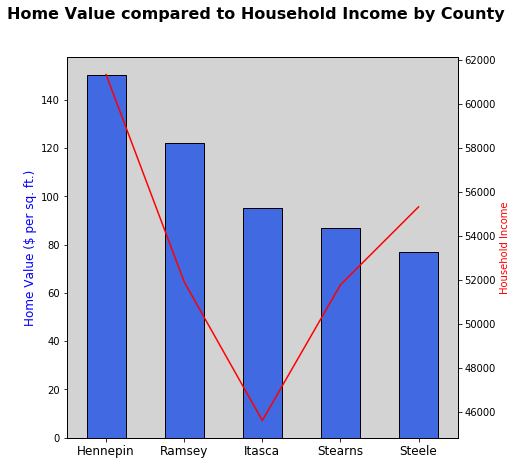

In [11]:
myplot(merge3_df,"Household Income","Home Value compared to Household Income by County","County","Home Value ($ per sq. ft.)",
       "Household Income","Output/Household_Income.png")

In [12]:
#cut to county and education
education_df=census_df.iloc[:,1:18]                   
merge4_df=pd.merge(home_val_df,education_df,how='outer',on="County")

merge4_df["per_less_than_HS"]=(merge4_df["Less Than High School"]/ merge4_df["Population"])*100
merge4_df["per_HS"]=(merge4_df["High School"]/ merge4_df["Population"])*100
merge4_df["per_some_college"]=(merge4_df["Some College or Associate's Degree"]/ merge4_df["Population"])*100
merge4_df["per_bachelors"]=(merge4_df["Bachelor's Degree"]/ merge4_df["Population"])*100
merge4_df["per_graduate"]=(merge4_df["Graduate or Professional Degree"]/ merge4_df["Population"])*100
merge4_df

,Year,County,MedianValuePerSqft,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,White,...,Less Than High School,High School,Some College or Associate's Degree,Bachelor's Degree,Graduate or Professional Degree,per_less_than_HS,per_HS,per_some_college,per_bachelors,per_graduate
0,2010,Hennepin,150,1136522.0,35.9,61328.0,35902.0,134363.0,11.822296,869704.0,...,60019.0,151220.0,215800.0,223883.0,111801.0,5.280936,13.305506,18.987754,19.698959,9.837117
1,2010,Ramsey,122,503113.0,34.7,51915.0,28956.0,77325.0,15.369311,365854.0,...,32867.0,77123.0,88169.0,76600.0,49465.0,6.532727,15.329161,17.524691,15.225208,9.831787
2,2010,Itasca,95,44835.0,44.5,45621.0,23465.0,5166.0,11.522248,42156.0,...,2443.0,10824.0,11911.0,4660.0,1960.0,5.448868,24.141853,26.566299,10.393666,4.371585
3,2010,Stearns,87,147927.0,33.1,51779.0,24816.0,17894.0,12.096507,137089.0,...,9065.0,27904.0,31373.0,14321.0,6804.0,6.128023,18.863358,21.208434,9.681127,4.599566
4,2010,Steele,77,36434.0,38.0,55321.0,25062.0,2717.0,7.457320,34107.0,...,2554.0,8625.0,7694.0,3824.0,1505.0,7.009936,23.672943,21.117637,10.495691,4.130757


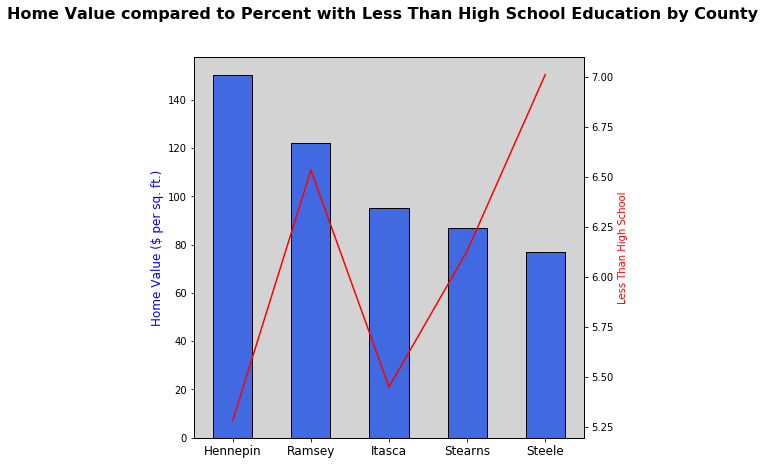

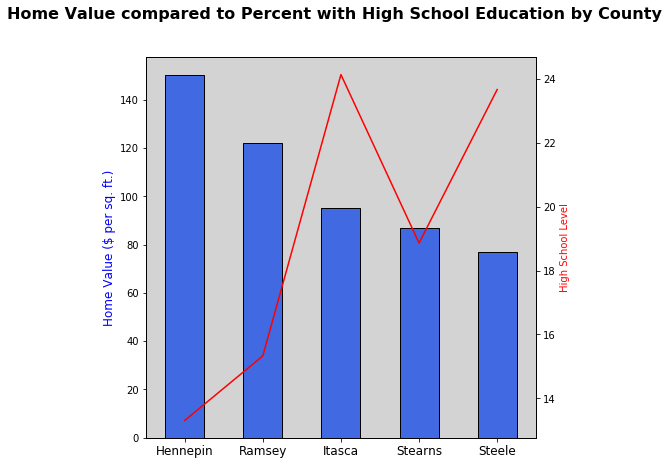

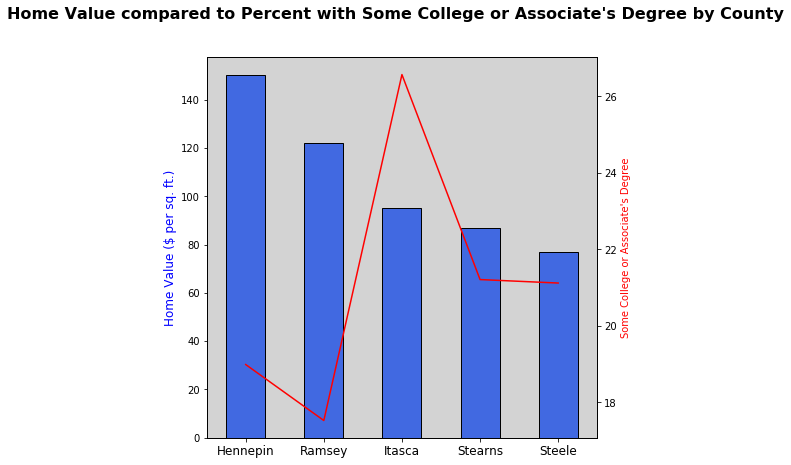

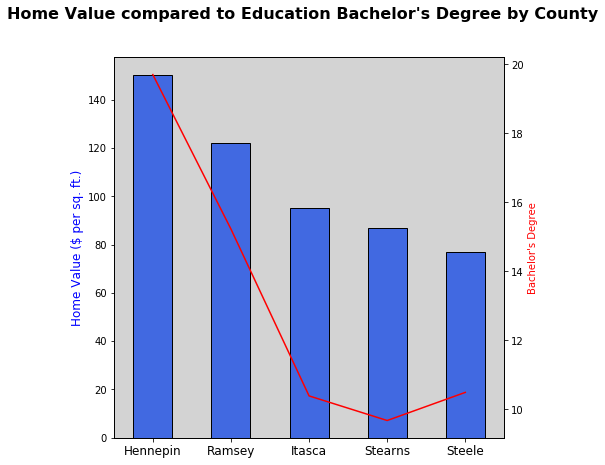

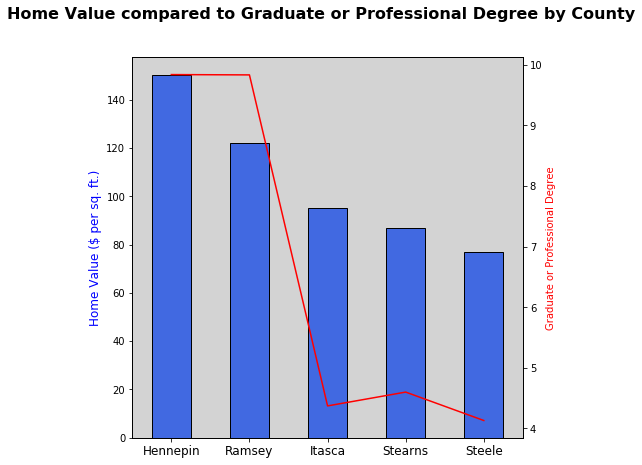

In [13]:
myplot(merge4_df,"per_less_than_HS","Home Value compared to Percent with Less Than High School Education by County","County","Home Value ($ per sq. ft.)",
       "Less Than High School","Output/Less_Than_High_School.png")
myplot(merge4_df,"per_HS","Home Value compared to Percent with High School Education by County","County","Home Value ($ per sq. ft.)",
       "High School Level","Output/High_School.png")
myplot(merge4_df,"per_some_college","Home Value compared to Percent with Some College or Associate's Degree by County","County","Home Value ($ per sq. ft.)",
       "Some College or Associate's Degree","Output/AssociateDegree.png")
myplot(merge4_df,"per_bachelors","Home Value compared to Education Bachelor's Degree by County","County","Home Value ($ per sq. ft.)",
       "Bachelor's Degree","Output/Bachelor_Degree.png")
myplot(merge4_df,"per_graduate","Home Value compared to Graduate or Professional Degree by County","County","Home Value ($ per sq. ft.)",
       "Graduate or Professional Degree","Output/Graduate_Degree.png")


In [14]:
census_df["Per_White"]=(census_df["White"]/census_df["Population"])*100
census_df["Per_Black or African American"]=(census_df["Black or African American"]/census_df["Population"])*100
census_df["Per_American Indian or Alaska Native"]=(census_df["American Indian or Alaska Native"]/census_df["Population"])*100
census_df["Per_Asian"]=(census_df["Asian"]/census_df["Population"])*100
census_df["Per_Hawaiian or Other Pacific Islander"]=(census_df["Hawaiian or Other Pacific Islander"]/census_df["Population"])*100
census_df

,State,County,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,White,Black or African American,...,Less Than High School,High School,Some College or Associate's Degree,Bachelor's Degree,Graduate or Professional Degree,Per_White,Per_Black or African American,Per_American Indian or Alaska Native,Per_Asian,Per_Hawaiian or Other Pacific Islander
0,27,Itasca,44835.0,44.5,45621.0,23465.0,5166.0,11.522248,42156.0,150.0,...,2443.0,10824.0,11911.0,4660.0,1960.0,94.024757,0.334560,3.109178,0.388090,0.000000
1,27,Hennepin,1136522.0,35.9,61328.0,35902.0,134363.0,11.822296,869704.0,130404.0,...,60019.0,151220.0,215800.0,223883.0,111801.0,76.523288,11.473953,0.822069,6.029184,0.045314
2,27,Ramsey,503113.0,34.7,51915.0,28956.0,77325.0,15.369311,365854.0,52512.0,...,32867.0,77123.0,88169.0,76600.0,49465.0,72.718057,10.437417,0.691892,11.117383,0.043728
3,27,Stearns,147927.0,33.1,51779.0,24816.0,17894.0,12.096507,137089.0,3847.0,...,9065.0,27904.0,31373.0,14321.0,6804.0,92.673413,2.600607,0.286628,1.919866,0.027040
4,27,Steele,36434.0,38.0,55321.0,25062.0,2717.0,7.457320,34107.0,935.0,...,2554.0,8625.0,7694.0,3824.0,1505.0,93.613109,2.566284,0.096064,0.839875,0.000000


In [15]:
#County_Race_Education_df= census_df [["County", "Per Capita Income", "Median Age"]]
County_Race_Education_df= census_df [[ "County", "Per_White", "Per_Black or African American", "Per_American Indian or Alaska Native",
                      "Per_Asian", "Per_Hawaiian or Other Pacific Islander"]]

merge_df=pd.merge(home_val_df,County_Race_Education_df,how='outer',on="County")
#merge_df.set_index('County', inplace=True)
merge_df

,Year,County,MedianValuePerSqft,Per_White,Per_Black or African American,Per_American Indian or Alaska Native,Per_Asian,Per_Hawaiian or Other Pacific Islander
0,2010,Hennepin,150,76.523288,11.473953,0.822069,6.029184,0.045314
1,2010,Ramsey,122,72.718057,10.437417,0.691892,11.117383,0.043728
2,2010,Itasca,95,94.024757,0.334560,3.109178,0.388090,0.000000
3,2010,Stearns,87,92.673413,2.600607,0.286628,1.919866,0.027040
4,2010,Steele,77,93.613109,2.566284,0.096064,0.839875,0.000000


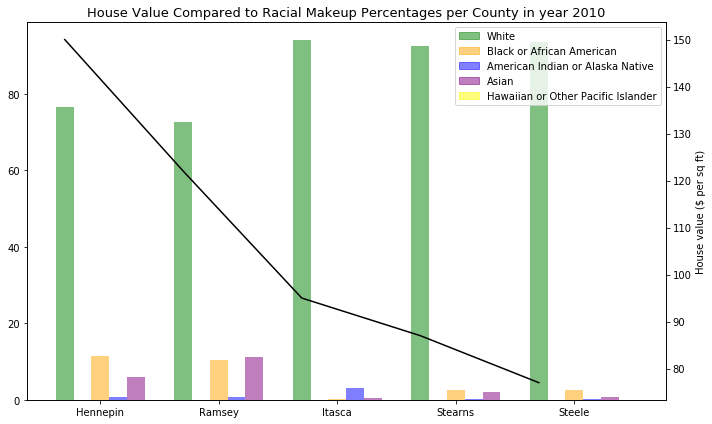

In [16]:
x=np.arange(len(merge_df['County']))
opacity=0.5 #Not so dark
bar_width= 0.15

#plot data
#use zorder to put bars in front of grid
plt.rcParams['figure.figsize']=(10,6)
plt.bar(x, merge_df["Per_White"], width=bar_width, color='g', alpha=opacity)
plt.bar(x+bar_width*2, merge_df["Per_Black or African American"], width=bar_width, color='orange', alpha=opacity)
plt.bar(x+bar_width*3, merge_df["Per_American Indian or Alaska Native"], width=bar_width, color='blue', alpha=opacity)
plt.bar(x+bar_width*4, merge_df["Per_Asian"], width=bar_width, color='purple', alpha=opacity)
plt.bar(x+bar_width*5, merge_df["Per_Hawaiian or Other Pacific Islander"], width=bar_width, color='yellow', alpha=opacity)

merge_df["MedianValuePerSqft"].plot(kind='line',secondary_y=True,color='black')
#Adjust x until it is centered
plt.xticks(x + bar_width*2, merge_df['County'])
plt.title('House Value Compared to Racial Makeup Percentages per County in year 2010', fontsize = 13)
plt.ylabel('House value ($ per sq ft)', fontsize=10)
plt.xlabel('Counties', fontsize=10)

#legend
white_patch=mpatches.Patch(color='g', label='White',alpha=opacity)
black_patch=mpatches.Patch(color='orange', label='Black or African American', alpha=opacity)
American_Indian_patch=mpatches.Patch(color='blue', label='American Indian or Alaska Native', alpha=opacity)
Asian_patch=mpatches.Patch(color='purple', label='Asian', alpha=opacity)
Hawaiian_patch=mpatches.Patch(color='yellow', label='Hawaiian or Other Pacific Islander', alpha=opacity)
plt.legend(handles=[white_patch, black_patch, American_Indian_patch, Asian_patch, Hawaiian_patch], loc='upper right')
plt.grid(axis='white')

plt.tight_layout()
plt.savefig("Output/racecluster.png")
plt.show()
